In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
#constantes definition:

#G =
#M =
b = 0.9     #modif
c = 0.2    #modif
rc = 100

#b=0.7
#c=0.2
#rc=1e6

#CI vitesse:

vx = 0
vy = 0.2    #modif
vz = 0.2   #modif
v0=np.sqrt(vx*vx+vy*vy+vz*vz)

#CI position:

x = 1    #modif
y = 0
z = 0

#x=0.44
#vy=0.1
#vz=0.4
#v0=np.sqrt(vx*vx+vy*vy+vz*vz)

#r = np.array([x,y,z])


In [3]:
def potential(x,y,z):
    #print ((v0*v0/2)*math.log((x*x+(y/b)*(y/b)+(z/c)*(z/c))/(rc*rc)))
    return (v0*v0/2)*math.log((x*x+(y/b)*(y/b)+(z/c)*(z/c))/(rc*rc))

def acceleration_x(x,y,z):
    return -((v0*v0)/(x*x+(y/b)*(y/b)+(z/c)*(z/c)))*x

def acceleration_y(x,y,z):
    return -((v0*v0)/(x*x+(y/b)*(y/b)+(z/c)*(z/c)))*(y/(b*b))

def acceleration_z(x,y,z):
    return -((v0*v0)/(x*x+(y/b)*(y/b)+(z/c)*(z/c)))*(z/(c*c))


In [4]:
#Runge Kutta ordre 4 

#step definition
h=1e-2

#listes vides
X = []
Y = []
Z = []
Vx = []
Vy = []
Vz = []

N = 1e3

E = []

for k in np.arange (0,N,h):

    #ordre1
    kx1 = vx*h
    ky1 = vy*h
    kz1 = vz*h
    ku1 = h*acceleration_x( x, y, z)
    kv1 = h*acceleration_y( x, y, z)
    kw1 = h*acceleration_z( x, y, z)

    #ordre2
    kx2 = (vx+0.5*ku1)*h
    ky2 = (vy+0.5*kv1)*h
    kz2 = (vz+0.5*kw1)*h
    ku2 = h*acceleration_x( x+kx1/2, y+ky1/2, z+kz1/2)
    kv2 = h*acceleration_y( x+kx1/2, y+ky1/2, z+kz1/2)
    kw2 = h*acceleration_z( x+kx1/2, y+ky1/2, z+kz1/2)

    #ordre3
    kx3 = (vx+0.5*ku2)*h
    ky3 = (vy+0.5*kv2)*h
    kz3 = (vz+0.5*kw2)*h
    ku3 = h*acceleration_x( x+kx2/2, y+ky2/2, z+kz2/2)
    kv3 = h*acceleration_y( x+kx2/2, y+ky2/2, z+kz2/2)
    kw3 = h*acceleration_z( x+kx2/2, y+ky2/2, z+kz2/2)

    #ordre4
    kx4 = (vx+ku3)*h
    ky4 = (vy+kv3)*h
    kz4 = (vz+kw3)*h
    ku4 = h*acceleration_x( x+kx3, y+ky3, z+kz3)
    kv4 = h*acceleration_y( x+kx3, y+ky3, z+kz3)
    kw4 = h*acceleration_z( x+kx3, y+ky3, z+kz3)

    #calcul des positions 
    x += (kx1+2*kx2+2*kx3+kx4)/6.
    y += (ky1+2*ky2+2*ky3+ky4)/6.
    z += (kz1+2*kz2+2*kz3+kz4)/6.

    #calcul des vitesses
    vx += (ku1+2*ku2+2*ku3+ku4)/6.
    vy += (kv1+2*kv2+2*kv3+kv4)/6.
    vz += (kw1+2*kw2+2*kw3+kw4)/6.

    #ajout aux listes
    X.append(x)
    Y.append(y)
    Z.append(z)
    Vx.append(vx)
    Vy.append(vy)
    Vz.append(vz)

    #calcul de l'energy
    E.append(0.5*(vx*vx+vy*vy+vz*vz)+potential(x,y,z))

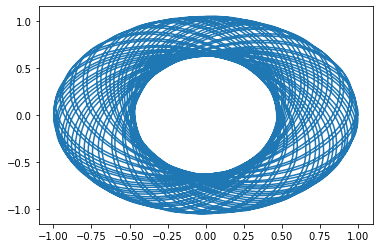

In [5]:
plt.figure()

plt.plot(X,Y)

plt.show()

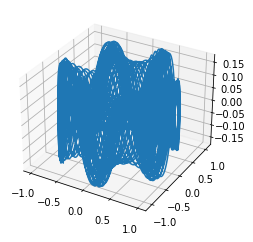

In [6]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(X, Y, Z)

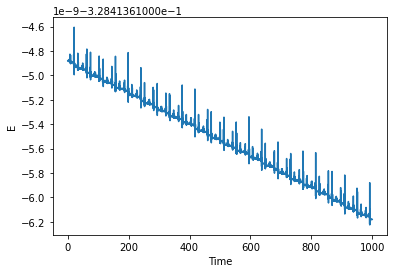

In [7]:
T=np.arange(0,1000,h)
plt.figure()
plt.plot(T,E)
plt.xlabel('Time')
plt.ylabel('E')
plt.show()

In [8]:
list_dE=[]
H = []

N = 1e3

for h in np.arange(0.1,10,0.01):
    E0 = 0
    E1=0
    for k in np.arange (0,N,h):

        #ordre1
        kx1 = vx*h
        ky1 = vy*h
        kz1 = vz*h
        ku1 = h*acceleration_x( x, y, z)
        kv1 = h*acceleration_y( x, y, z)
        kw1 = h*acceleration_z( x, y, z)

        #ordre2
        kx2 = (vx+0.5*ku1)*h
        ky2 = (vy+0.5*kv1)*h
        kz2 = (vz+0.5*kw1)*h
        ku2 = h*acceleration_x( x+kx1/2, y+ky1/2, z+kz1/2)
        kv2 = h*acceleration_y( x+kx1/2, y+ky1/2, z+kz1/2)
        kw2 = h*acceleration_z( x+kx1/2, y+ky1/2, z+kz1/2)

        #ordre3
        kx3 = (vx+0.5*ku2)*h
        ky3 = (vy+0.5*kv2)*h
        kz3 = (vz+0.5*kw2)*h
        ku3 = h*acceleration_x( x+kx2/2, y+ky2/2, z+kz2/2)
        kv3 = h*acceleration_y( x+kx2/2, y+ky2/2, z+kz2/2)
        kw3 = h*acceleration_z( x+kx2/2, y+ky2/2, z+kz2/2)

        #ordre4
        kx4 = (vx+ku3)*h
        ky4 = (vy+kv3)*h
        kz4 = (vz+kw3)*h
        ku4 = h*acceleration_x( x+kx3, y+ky3, z+kz3)
        kv4 = h*acceleration_y( x+kx3, y+ky3, z+kz3)
        kw4 = h*acceleration_z( x+kx3, y+ky3, z+kz3)

        #calcul des positions 
        x += (kx1+2*kx2+2*kx3+kx4)/6.
        y += (ky1+2*ky2+2*ky3+ky4)/6.
        z += (kz1+2*kz2+2*kz3+kz4)/6.

        #calcul des vitesses
        vx += (ku1+2*ku2+2*ku3+ku4)/6.
        vy += (kv1+2*kv2+2*kv3+kv4)/6.
        vz += (kw1+2*kw2+2*kw3+kw4)/6.

        #calcul de l'energy
        #E.append(0.5*(vx*vx+vy*vy+vz*vz)+potential(x,y,z))
        if k == 0: E0=0.5*(vx*vx+vy*vy+vz*vz)+potential(x,y,z)
        if k == N-h: E1=0.5*(vx*vx+vy*vy+vz*vz)+potential(x,y,z)

    dE=E0-E1
    list_dE.append(dE)
    H.append(h)

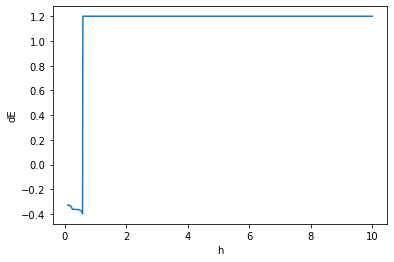

[-0.3284136151338785, -0.3285370557973315, -0.32873767205329163, -0.3290448334723909, -0.3294981779983038, -0.330144215243505, -0.33106332833568053, -0.33230244879215287, -0.33397718718229547, -0.33624055261666097, -0.3391944568032009, -0.3429416353822827, -0.347575367036299, -0.3529101886028399, -0.35791430704151594, -0.36089718629271195, -0.36179392842555513, -0.36196273269769275, -0.3620205245756336, -0.3620766072409187, -0.362142465369801, -0.36221997317299326, -0.36231212450516354, -0.3624200089387156, -0.36254499354571224, -0.3626926640200094, -0.36286300959825923, -0.3630571318321281, -0.3632840577328247, -0.3635433004510697, -0.3638401731203651, -0.3641812365960876, -0.3645687449586324, -0.36501305653916605, -0.3655166905173269, -0.36608810899272776, -0.3667453199956565, -0.3674910133471543, -0.36834993834888796, -0.36932576791325605, -0.37045630442629923, -0.3717769390555309, -0.37331690461652073, -0.37517346825534903, -0.37742109245040717, -0.38025323408593786, -0.38402712136

In [9]:
plt.figure()
plt.plot(H,list_dE)
plt.xlabel('h')
plt.ylabel('dE')
plt.show()
print(list_dE)